## Creating Histograms

In the cells below I import packages, import the summary citation dataset, and create indicator variables for external and abrupt patents. Then histograms and summary statistics are created for the following categories: internal incremental, internal abrupt, and external abrupt.

In [2]:
# Import packages
import pandas as pd
import numpy as np
import numpy.linalg as lin
import scipy.stats as sts
import scipy.integrate as intgr
import scipy.optimize as opt
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#Setting plot colors
cmap1 = matplotlib.cm.get_cmap('summer')
%matplotlib notebook

In [3]:
#Loading data as a pandas dataset
data2 = pd.read_csv('cit_external_comn_share.csv', sep = ',', header = 0, index_col = 0)
#Deleting patents before 1976
data2 = data2[data2.appyear > 1975]

C:\Users\Public\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
data2['external_share'] = data2.external_share.replace(np.nan, -1)
level = np.rint(np.size(data2['tot_cit_correct'].dropna())
                                                   - 0.1 * np.size(data2['tot_cit_correct'].
                                                                   dropna()))
cutoff = np.sort(data2['tot_cit_correct'].dropna())[int(level)]
cutoff

10.6616

In [5]:
#This function will be used to determine whether a patent is abrupt or incremental.
#A patent at the top 10% of expected citations is set to be aprupt

def abrupt(cites, cutoff):
    #The cutoff value that defines an abrupt innovation can be adjusted
    if cites >= cutoff:
        return 0
    else:
        return 1
    
#Creating a new column for the indicator variable 'incremental'
data2['Increment'] = data2['tot_cit_correct'].apply(abrupt, cutoff = cutoff)
data2['tot_abr_inc_cit_correct'] = data2['tot_cit_correct'] - data2['tot_external_correct']
data2['tot_abr_class_cit_correct'] = data2['tot_cit_correct'] - data2['tot_external_class_correct']

#Defining External Patents
#The definition will depend on the share of citations that are external.
#That variable has many missing values for patents with no citations. This line replaces
#those missing values with -1. 
data2['external_share'] = data2.external_share.replace(np.nan, -1)
#Now I define a function to determine whether a patent is external
def external(cites):
    cutoff = 0.5
    if cites >= cutoff:
        return 1
    else:
        return 0
data2['External'] = data2['external_share'].apply(external)
print(np.mean(data2['Increment']))

0.899991542938089


In [6]:
print(np.size(data2[data2.External == 1]))
print(np.size(data2[data2.External == 0]))

8709180
29129020


<IPython.core.display.Javascript object>


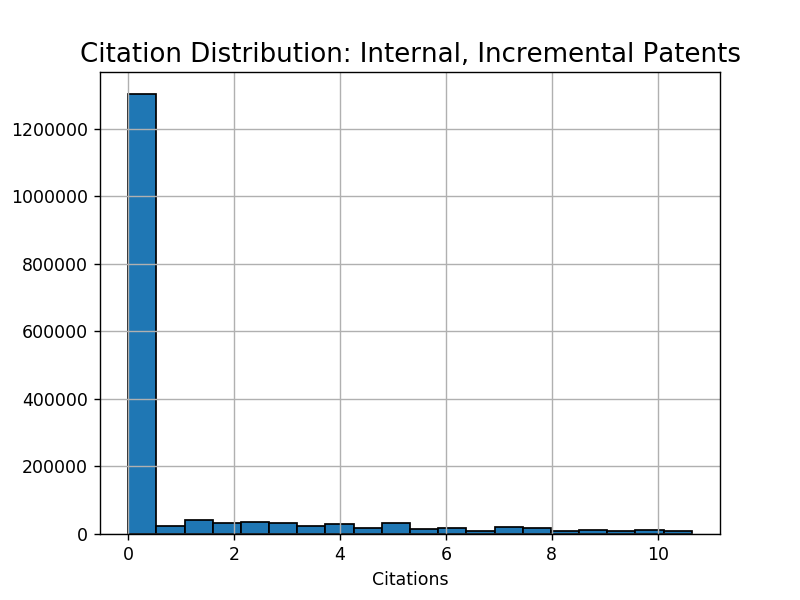

Total, mean, standard deviation: 1702703 , 1.0452714309813296 , 2.293187572379963


<IPython.core.display.Javascript object>


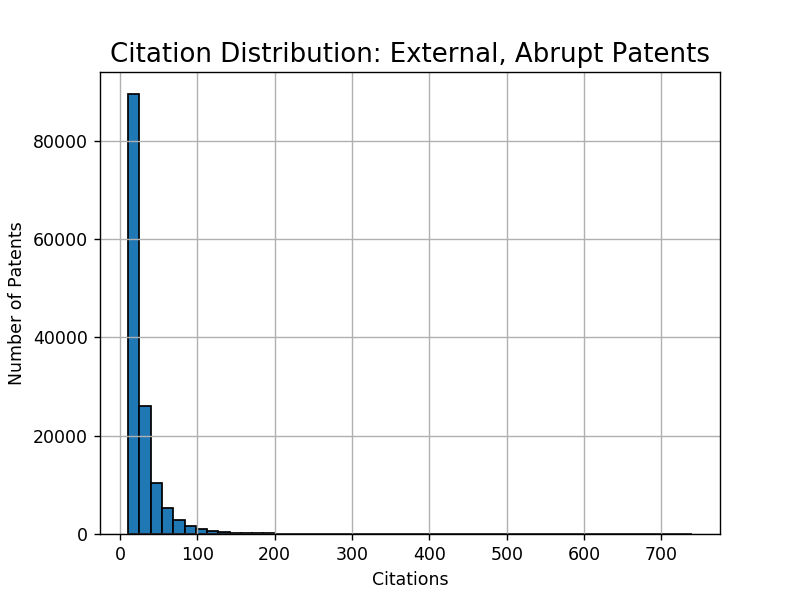

Total, mean, standard deviation: 139227 , 28.339301601706214 , 27.29738437627662


<IPython.core.display.Javascript object>


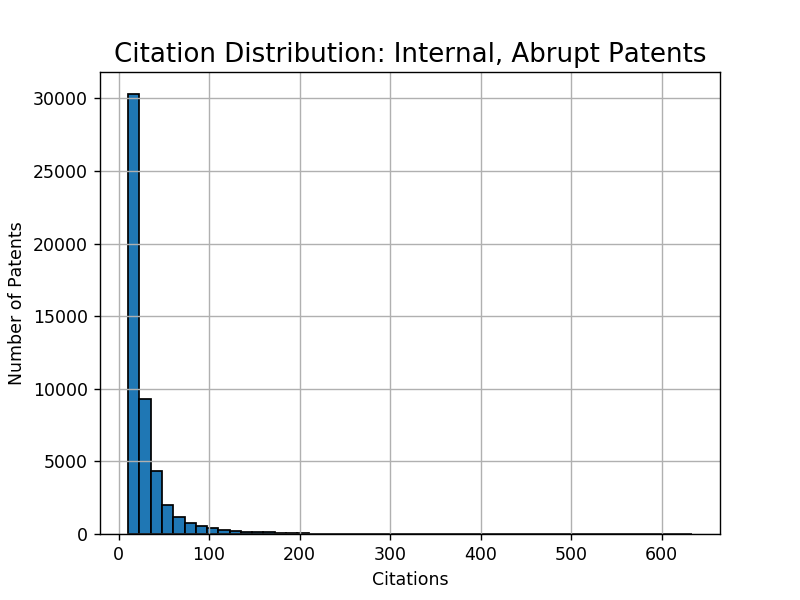

Total, mean, standard deviation: 49980 , 28.811253965590097 , 28.92134667414797


<IPython.core.display.Javascript object>


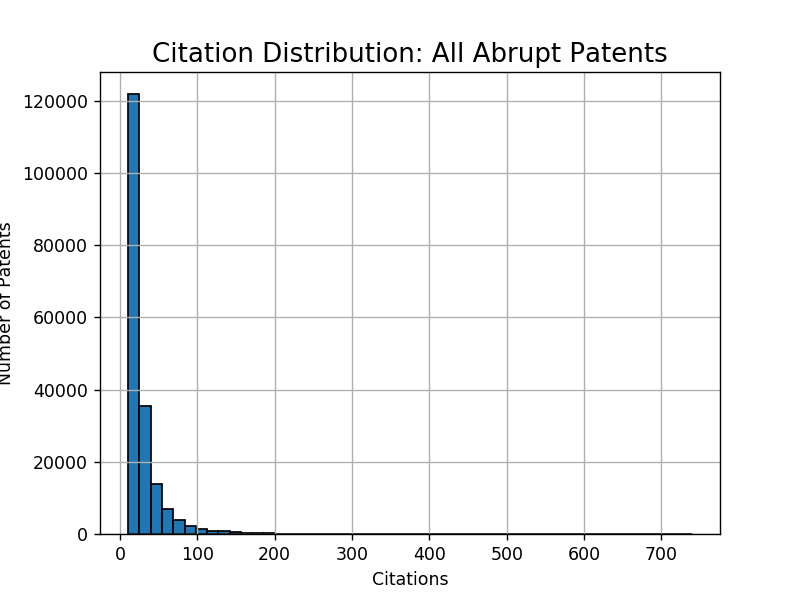

Total, mean, standard deviation: 189207 , 28.463970240531847 , 27.736385607322156


<IPython.core.display.Javascript object>


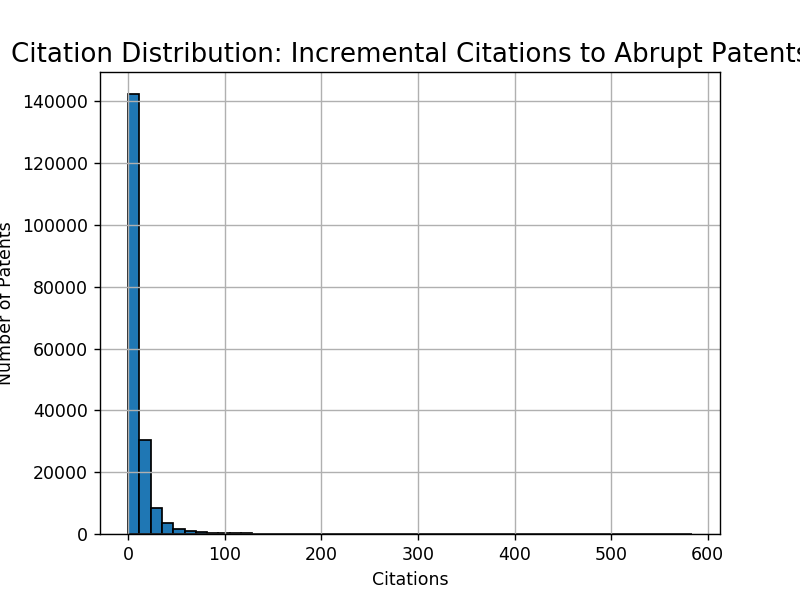

Total, mean, standard deviation: 189207 , 8.850634295773176 , 16.309264325805366


<IPython.core.display.Javascript object>


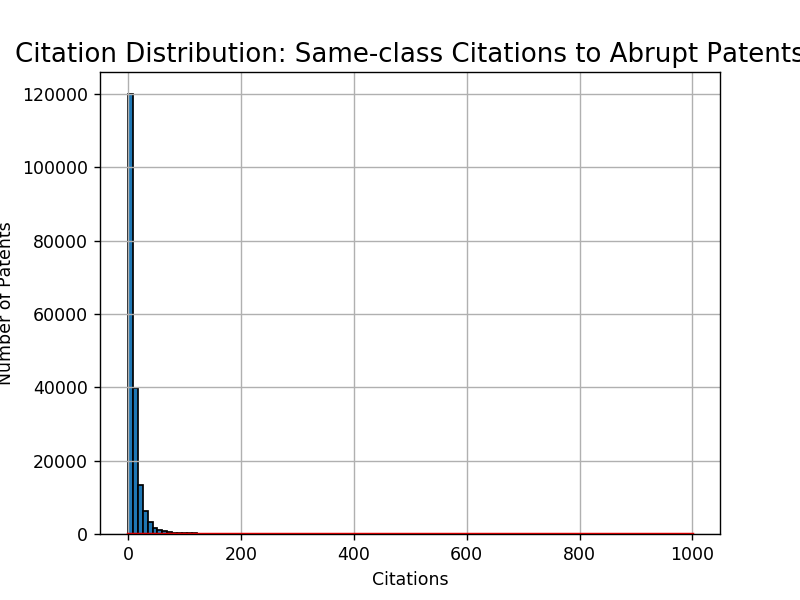

Total, mean, standard deviation: 189207 , 10.06398987669824 , 18.42557679906264
Summary Statistics for "External, incremental patents: 
Total, mean, standard deviation: 296232 , 4.47239161219741 , 2.6815898976775547


In [7]:
#data3 = data2[data2.icl_class == 'G01N']
#data3.hist(column = 'appyear')

#Plotting internal incremental innovation
#Eliminated observations that are not internal incremental
data3 = data2[data2.Increment == 1]
data3.hist(column = 'tot_cit_correct', bins = 20, edgecolor = 'black')
plt.title('Citation Distribution: Internal, Incremental Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
#Printing out summary statistics
print('Total, mean, standard deviation:', len(data3), ',', np.mean(data3.tot_cit_correct),',',
      np.std(data3.tot_cit_correct))

#External Abrupt innovation
data3 = data2[(data2.Increment == 0) & (data2.External == 1)]
data3.hist(column = 'tot_cit_correct', bins = 50, edgecolor = 'black')
plt.title('Citation Distribution: External, Abrupt Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
print('Total, mean, standard deviation:', len(data3), ',', np.mean(data3.tot_cit_correct),',',
      np.std(data3.tot_cit_correct))

#Internal abrupt innovation
data3 = data2[(data2.Increment == 0) & (data2.External == 0)]
data3.hist(column = 'tot_cit_correct', bins = 50, edgecolor = 'black')
plt.title('Citation Distribution: Internal, Abrupt Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
print('Total, mean, standard deviation:', len(data3), ',', np.mean(data3.tot_cit_correct),',',
      np.std(data3.tot_cit_correct))

#Total abrupt innovation
data3 = data2[(data2.Increment == 0)]
data3.hist(column = 'tot_cit_correct', bins = 50, edgecolor = 'black')
plt.title('Citation Distribution: All Abrupt Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
print('Total, mean, standard deviation:', len(data3), ',', np.mean(data3.tot_cit_correct),',',
      np.std(data3.tot_cit_correct))

#Total incremental citations to abrupt patents
data3 = data2[(data2.Increment == 0)]
data3.hist(column = 'tot_abr_inc_cit_correct', bins = 50, edgecolor = 'black')
plt.title('Citation Distribution: Incremental Citations to Abrupt Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
print('Total, mean, standard deviation:', len(data3), ',', np.mean(data3.tot_abr_inc_cit_correct),',',
      np.std(data3.tot_abr_inc_cit_correct))

#Total same class citations to abrupt patents
data3 = data2[(data2.Increment == 0)]
data3.hist(column = 'tot_abr_class_cit_correct', bins = 50, edgecolor = 'black')
plt.title('Citation Distribution: Same-class Citations to Abrupt Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
print('Total, mean, standard deviation:', len(data3), ',', np.mean(
    data3.tot_abr_class_cit_correct),',', np.std(data3.tot_abr_class_cit_correct))

#Printing the amount of observations that would be "external incremental"
data3 = data2[(data2.Increment == 1) & (data2.External == 1)]
print('Summary Statistics for "External, incremental patents: ')
print('Total, mean, standard deviation:', len(data3), ',', np.mean(data3.tot_cit_correct),',',
      np.std(data3.tot_cit_correct))

## Estimation (in progress)

In [8]:
Patent_evol = pd.read_csv('evol_pat_year_count_df.csv', sep = ',', header = 0, index_col = 0)
Innov_emp = pd.read_csv('Innov_emp.csv', sep = ',', header = 0, index_col = 0)
#Entry rate per 5 years (by employment)
entry_rate1976 = Patent_evol.emp[(Patent_evol.firstYear >= 1976) & (
    Patent_evol.firstYear < 1981)].sum() / Innov_emp.emp[(Innov_emp.fyear >= 1976) &
                                                                   (Innov_emp.fyear < 2006)].sum()
entry_rate1981 = Patent_evol.emp[(Patent_evol.firstYear >= 1981) & (
    Patent_evol.firstYear < 1986)].sum() / Innov_emp.emp[(Innov_emp.fyear >= 1976) &
                                                                   (Innov_emp.fyear < 2006)].sum()
entry_rate1986 = Patent_evol.emp[(Patent_evol.firstYear >= 1986) & (
    Patent_evol.firstYear < 1991)].sum() / Innov_emp.emp[(Innov_emp.fyear >= 1976) &
                                                                   (Innov_emp.fyear < 2006)].sum()
entry_rate1991 = Patent_evol.emp[(Patent_evol.firstYear >= 1991) & (
    Patent_evol.firstYear < 1996)].sum() / Innov_emp.emp[(Innov_emp.fyear >= 1976) &
                                                                   (Innov_emp.fyear < 2006)].sum()
entry_rate1996 = Patent_evol.emp[(Patent_evol.firstYear >= 1996) & (
    Patent_evol.firstYear < 2001)].sum() / Innov_emp.emp[(Innov_emp.fyear >= 1976) &
                                                                   (Innov_emp.fyear < 2006)].sum()
entry_rate2001= Patent_evol.emp[(Patent_evol.firstYear >= 2001) & (
    Patent_evol.firstYear < 2006)].sum() / Innov_emp.emp[(Innov_emp.fyear >= 1976) &
                                                                   (Innov_emp.fyear < 2006)].sum()
print('Entry rates: \n1976 - 1980 = ', entry_rate1976, '\n1981 - 1985 = ', entry_rate1981,
     '\n1986 - 1990 = ', entry_rate1986, '\n1991 - 1995 = ', entry_rate1991,
     '\n1996 - 2000 = ', entry_rate1996, '\n2001 - 2005 = ', entry_rate2001)

Entry rates: 
1976 - 1980 =  0.0021245205023886736 
1981 - 1985 =  0.0023513519177680454 
1986 - 1990 =  0.002191138646583526 
1991 - 1995 =  0.001965464743272693 
1996 - 2000 =  0.0044289127179007156 
2001 - 2005 =  0.0018598440948136667


In [9]:
#Entry rate per 5 years (by nb firms)
entry_rate1976 = Patent_evol.firstYear[(Patent_evol.firstYear >= 1976) & (
    Patent_evol.firstYear < 1981)].count()/Innov_emp.nbfirms[(Innov_emp.fyear >= 1976) & 
                                                          (Innov_emp.fyear < 1981)].sum()
entry_rate1981 = Patent_evol.firstYear[(Patent_evol.firstYear >= 1981) & (
    Patent_evol.firstYear < 1986)].count()/Innov_emp.nbfirms[(Innov_emp.fyear >= 1981) & 
                                                          (Innov_emp.fyear < 1986)].sum()
entry_rate1986 = Patent_evol.firstYear[(Patent_evol.firstYear >= 1986) & (
    Patent_evol.firstYear < 1991)].count()/Innov_emp.nbfirms[(Innov_emp.fyear >= 1986) & 
                                                          (Innov_emp.fyear < 1991)].sum()
entry_rate1991 = Patent_evol.firstYear[(Patent_evol.firstYear >= 1991) & (
    Patent_evol.firstYear < 1996)].count()/Innov_emp.nbfirms[(Innov_emp.fyear >= 1991) & 
                                                          (Innov_emp.fyear < 1996)].sum()
entry_rate1996 = Patent_evol.firstYear[(Patent_evol.firstYear >= 1996) & (
    Patent_evol.firstYear < 2001)].count()/Innov_emp.nbfirms[(Innov_emp.fyear >= 1996) & 
                                                          (Innov_emp.fyear < 2001)].sum()
entry_rate2001 = Patent_evol.firstYear[(Patent_evol.firstYear >= 2001) & (
    Patent_evol.firstYear < 2006)].count()/Innov_emp.nbfirms[(Innov_emp.fyear >= 2001) & 
                                                          (Innov_emp.fyear < 2006)].sum()
print('Entry rates: \n1976 - 1980 = ', entry_rate1976, '\n1981 - 1985 = ', entry_rate1981,
     '\n1986 - 1990 = ', entry_rate1986, '\n1991 - 1995 = ', entry_rate1991,
     '\n1996 - 2000 = ', entry_rate1996, '\n2001 - 2005 = ', entry_rate2001)
entry_rate = np.mean(np.array([entry_rate1976, entry_rate1981, entry_rate1986, entry_rate1991
                             , entry_rate1996, entry_rate2001]))
print('Mean entry rate = ', entry_rate)
lambda_e = entry_rate

Entry rates: 
1976 - 1980 =  0.0704656355967 
1981 - 1985 =  0.0591484464902 
1986 - 1990 =  0.0625711845103 
1991 - 1995 =  0.067709919016 
1996 - 2000 =  0.0710200455328 
2001 - 2005 =  0.0266078444889
Mean entry rate =  0.0595871792725


In [86]:
def psi(theta):
    
    psi_k = [None] * 100
    for i in range(0, 100):
        psi_k[i] = theta * (1 - theta) ** i
    
    return psi_k

def omega(gamma_eta, alpha, theta, k):
    
    omega_k = ((gamma_eta * alpha ** k) * (1 - theta)) / (theta + (gamma_eta * alpha ** k
                                                                  ) * (1 - theta))
    return omega_k

def gamma_0(gamma_eta, alpha, theta, k):
    
    gamma_k_0 = (theta ** 2)*((1 - theta) ** k)/(theta + (gamma_eta * alpha ** k) * (1 - theta))
    
    return gamma_k_0

def gamma_n(gamma_eta, alpha, theta, n):
    
    gamma_k_n = [None] * 100
    for i in range(0, 100):
        gamma_k_n[i] = gamma_0(gamma_eta, alpha, theta, i) * (omega(gamma_eta, alpha, theta, i
                                                                       )) ** n
    return gamma_k_n

In [163]:
def model_moments(gamma_eta, alpha, theta):
    
    F_n_mod = [None] * 1000
    for n in range(0, 1000):
        F_n_mod[n] = np.dot(gamma_n(gamma_eta, alpha, theta, n), psi(theta))
    
    return np.mean(F_n_mod), np.var(F_n_mod), sts.kurtosis(F_n_mod)

def data_moments(xvals):
    
    unique, counts = np.unique(xvals, return_counts=True)
    F_n_data = counts / np.size(np.array(xvals))
    
    return np.mean(F_n_data), np.var(F_n_data), sts.kurtosis(F_n_data)

def err_vec(xvals, gamma_eta, alpha, theta, simple):
    
    F_n_mean_mod, F_n_var_mod, F_n_kur_mod = model_moments(gamma_eta, alpha, theta)
    moms_mod = np.array([[F_n_mean_mod], [F_n_var_mod], [F_n_kur_mod]])
    F_n_mean_data, F_n_var_data, F_n_kur_data = data_moments(xvals)
    moms_data = np.array([[F_n_mean_data], [F_n_var_data], [F_n_kur_data]])
    if simple:
        err_vec = moms_mod - moms_data
    else:
        err_vec = (moms_mod - moms_data) / moms_data
    
    return err_vec

def crit_ext_distr(params, *args):
    
    gamma_eta, alpha, theta = params
    xvals, W = args
    err = err_vec(xvals, gamma_eta, alpha, theta, simple=False)
    crit_val = np.dot(np.dot(err.T, W), err) 
    
    return crit_val

In [164]:
cit_ext = data2[(data2.External == 1)]
ext_dist_data = np.array(cit_ext.tot_cit_correct.dropna().value_counts()) / np.size(
    np.array(cit_ext.tot_cit_correct.dropna()))
np.max(ext_dist_data)

0.0062539187472870211

In [165]:
gamma_eta_init = 0.5
alpha_init = 0.8
theta_init = 0.2
W_hat = np.eye(3)
params_init = np.array([gamma_eta_init, alpha_init, theta_init])
bnds = ((1e-5, None),(1e-5, 1-1e-5), (1e-5, 1-1e-5))
gmm_args = (np.array(cit_ext.tot_cit_correct.dropna()), W_hat)
results_ext_distr = opt.minimize(crit_ext_distr, params_init, args=(gmm_args),
                                 method='L-BFGS-B', bounds = bnds)
gamma_eta_GMM, alpha_GMM, theta_GMM = results_ext_distr.x
print('gamma_eta_GMM=', gamma_eta_GMM, 'alpha_GMM=', alpha_GMM, 'theta_GMM=', theta_GMM)

gamma_eta_GMM= 1.83683272443 alpha_GMM= 0.99999 theta_GMM= 0.107013663952


In [166]:
results_ext_distr

      fun: array([[ 0.22142157]])
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([  1.23234756e-06,   8.03301869e-05,  -9.17432796e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 100
      nit: 24
   status: 0
  success: True
        x: array([ 1.83683272,  0.99999   ,  0.10701366])

In [168]:
F_n_mean_mod, F_n_var_mod, F_n_kur_mod = model_moments(gamma_eta_GMM, alpha_GMM, theta_GMM)
F_n_mean_data, F_n_var_data, F_n_kur_data = data_moments(np.array(cit_ext.tot_cit_correct.dropna()))

err1 = err_vec(np.array(cit_ext.tot_cit_correct.dropna()), gamma_eta_GMM, alpha_GMM,
              theta_GMM, simple=False).reshape(3,)
print('F_n_mean_data =', F_n_mean_data, ', F_n_var_data =', F_n_var_data, 'F_n_kur_data =', F_n_kur_data)
print('F_n_mean_mod =', F_n_mean_mod, ', F_n_var_mod =', F_n_var_mod, 'F_n_kur_mod =', F_n_kur_mod)
print('Error vector=', err1)

F_n_mean_data = 0.000100260677762 , F_n_var_data = 8.80209579935e-08 F_n_kur_data = 68.21466225932195
F_n_mean_mod = 5.65316621142e-05 , F_n_var_mod = 9.77652554166e-08 F_n_kur_mod = 58.82764236413464
Error vector= [-0.4361532   0.11070429 -0.13761   ]


<IPython.core.display.Javascript object>


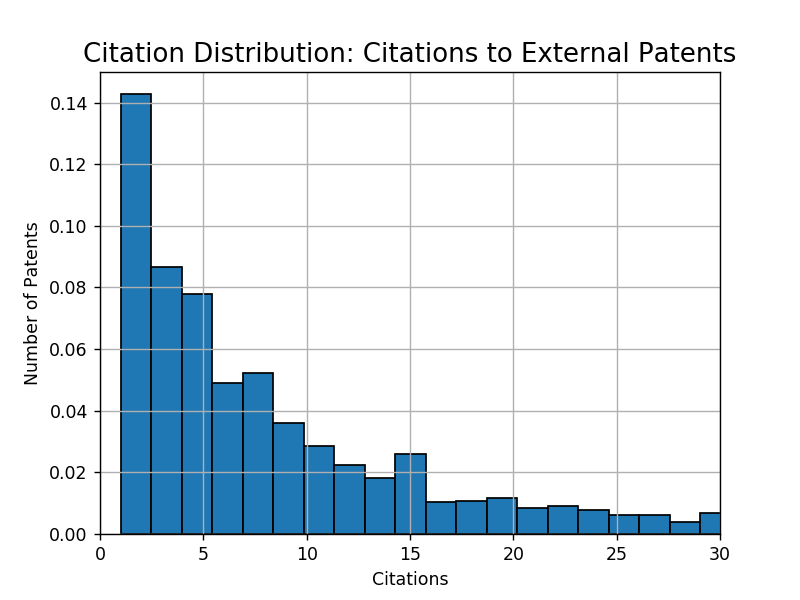

<IPython.core.display.Javascript object>


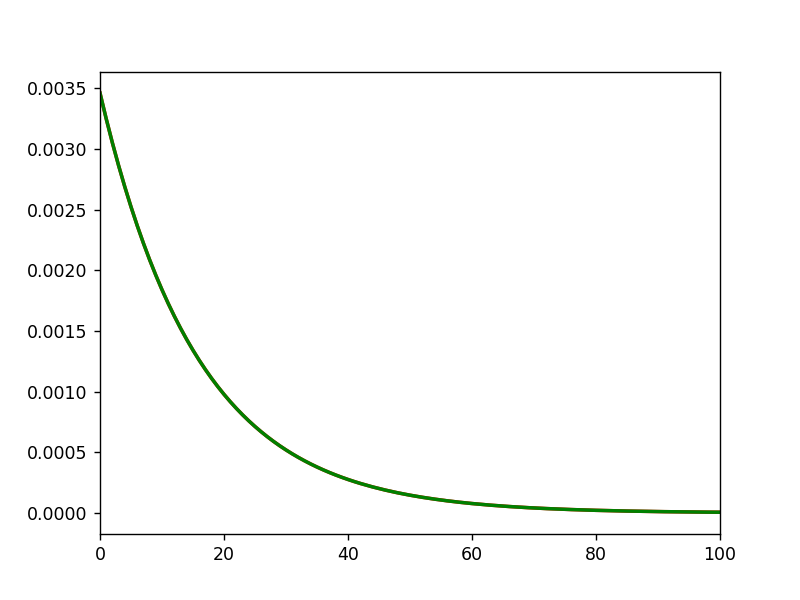

(0, 100)

In [169]:
# Plot the histogram of the data
#Total same class citations to abrupt patents
data3 = data2[(data2.External == 1)]
data3.hist(column = 'tot_cit_correct', normed=True, bins = 500, edgecolor = 'black')
plt.title('Citation Distribution: Citations to External Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
plt.xlim([0, 30])

# Plot the estimated GMM
plt.figure(8)
dist_pts = np.linspace(0, 999, 1000)
F_n_GMM = [None] * 1000
for n in range(0, 1000):
    F_n_GMM[n] = np.dot(gamma_n(gamma_eta_GMM, alpha_GMM, theta_GMM, n), psi(theta_GMM))

plt.plot(dist_pts, F_n_GMM, linewidth=2, color='r')
plt.xlim([0, 100])

In [171]:
err1 = err_vec(np.array(cit_ext.tot_cit_correct.dropna()), gamma_eta_GMM, alpha_GMM,
              theta_GMM, simple=False)
VCV2 = np.dot(err1, err1.T) / np.size(np.array(cit_ext.tot_cit_correct.dropna()))
print(VCV2)
W_hat2 = lin.pinv(VCV2)  # Use the pseudo-inverse calculated by SVD because VCV2 is ill-conditioned
print(W_hat2)

[[  4.36900683e-07  -1.10894013e-07   1.37845840e-07]
 [ -1.10894013e-07   2.81470882e-08  -3.49879936e-08]
 [  1.37845840e-07  -3.49879936e-08   4.34915217e-08]]
[[ 1689404.68395754  -428804.23811944   533021.38547808]
 [ -428804.23811944   108838.97527646  -135291.34331857]
 [  533021.38547808  -135291.34331857   168172.72976385]]


In [177]:
params_init = np.array([gamma_eta_GMM, alpha_GMM, theta_GMM])
bnds = ((1e-5, None),(1e-5, 1-1e-5), (1e-5, 1-1e-5))
gmm_args = (np.array(cit_ext.tot_cit_correct.dropna()), W_hat2)
results2_ext_distr = opt.minimize(crit_ext_distr, params_init, args=(gmm_args),
                                 method='L-BFGS-B', bounds = bnds)
gamma_eta_GMM2, alpha_GMM2, theta_GMM2 = results2_ext_distr.x
print('gamma_eta_GMM2=', gamma_eta_GMM2, 'alpha_GMM2=', alpha_GMM2, 'theta_GMM2=', theta_GMM2)

gamma_eta_GMM2= 1.83683073008 alpha_GMM2= 0.999988914265 theta_GMM2= 0.107014633507


In [178]:
results2_ext_distr

      fun: array([[ 435406.99980417]])
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([  -2.66591087,  135.92652977,  131.82288967])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 20
      nit: 1
   status: 0
  success: True
        x: array([ 1.83683073,  0.99998891,  0.10701463])

In [179]:
F_n_mean_mod2, F_n_var_mod2, F_n_kur_mod2 = model_moments(gamma_eta_GMM2, alpha_GMM2, theta_GMM2)
F_n_mean_data, F_n_var_data, F_n_kur_data = data_moments(np.array(cit_ext.tot_cit_correct.dropna()))

err2 = err_vec(np.array(cit_ext.tot_cit_correct.dropna()), gamma_eta_GMM2, alpha_GMM2,
              theta_GMM2, simple=False).reshape(3,)
print('F_n_mean_data =', F_n_mean_data, ', F_n_var_data =', F_n_var_data, 'F_n_kur_data =', F_n_kur_data)
print('F_n_mean_mod2 =', F_n_mean_mod2, ', F_n_var_mod2 =', F_n_var_mod2,
      'F_n_kur_mod2 =', F_n_kur_mod2)
print('Error vector=', err2)

F_n_mean_data = 0.000100260677762 , F_n_var_data = 8.80209579935e-08 F_n_kur_data = 68.21466225932195
F_n_mean_mod2 = 5.65322032518e-05 , F_n_var_mod2 = 9.77686430944e-08 F_n_kur_mod2 = 58.82858753063729
Error vector= [-0.4361478   0.11074277 -0.13759615]


In [180]:
plt.figure(8)
dist_pts = np.linspace(0, 999, 1000)
F_n_GMM2 = [None] * 1000
for n in range(0, 1000):
    F_n_GMM2[n] = np.dot(gamma_n(gamma_eta_GMM2, alpha_GMM2, theta_GMM2, n), psi(theta_GMM2))

plt.plot(dist_pts, F_n_GMM2, linewidth=2, color='g')
plt.xlim([0, 100])

(0, 100)

## Junk Code

The cells below do the following things, which might eventually be of use to us:
1. This lists the classifications in order of number of patents.
2. This is an attempt to determine for each patent how many years was the last abrupt patent within its classification. The code works, but it takes to long to run on my computer. It's also incomplete.
3. This cell imports the patent evolution dataset.

In [68]:
#This line finds the most common classifications
data2['icl_class'].value_counts()

In [19]:
#This cell was meant to create a column for how what step each patent was at in its product line's innovation path.
#The code works, but it takes too long to run on my computer.


#Sorting the values by class, then by year, then by the variable "Increment". The loop below needs 
  #abrupt patents from the same class and year to be listed above incremental ones.
data2 = data2.sort_values(['icl_class', 'appyear', 'Increment'])
#Resetting the index of the dataframe so the first row is labeled "0"
data2 = data2.reset_index(drop = True)
#Creating a new column for the year of the latest abrupt patent within a patent's classification. For now this
  #variable is set equal to negative one. The loop below fills it with the correct values.
data2['year_latest_abrupt'] = (data2['patent']*0) - 1

#This moves through every row of the dataset and sets the 'year_latest_abrupt' variable
for i in range(1, int(len(data2)/10)):
    #If the patent is abrupt, then 'year_latest_abrupt" is just equal to that patent's application year
    if data2.loc[i, 'Increment'] == 0:
        data2.loc[i, 'year_latest_abrupt'] = data2.loc[i, 'appyear']
    #If the patent is incremental, I set 'year_latest_abrupt to be equal to the previous row's 'year_latest_abrupt',
        #but only if the previous observation is within the same classification.
    elif data2.loc[i, 'icl_class'] == data2.loc[i-1, 'icl_class']:
        data2.loc[i, 'year_latest_abrupt'] = data2.loc[i-1, 'year_latest_abrupt']
#By the end of this loop, the variable 'year_latest_abrupt' should be correct. For patent's that we don't know the
  #year of the latest abrupt patent in its classification, 'year_latest_abrupt should be equal to negative one.

KeyboardInterrupt: 

In [26]:
#Loading data as a pandas dataset
cols = np.append((0, 1, 2), np.arange(30, 61))
data = pd.read_csv('aux_cit_evolution_year_count_df.csv', sep = ',', header = 0, index_col = 0,
                   usecols = cols)
data = data[data.appyear > 1975]
data = data.replace(np.nan, 0)